In [1]:
import os
import numpy as np
import cv2
import gc

In [2]:
#load the preprocessed data
data = np.load('./dataset_new/data_preprocess.npz')

In [3]:
X = data['arr_0']
Y = data['arr_1']

In [4]:
X.shape,Y.shape

((9959, 100, 100, 3), (9959,))

In [5]:
np.unique(Y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
onehot = OneHotEncoder()
Y_onehot = onehot.fit_transform(Y.reshape(-1,1))

In [8]:
Y_array = Y_onehot.toarray()

In [9]:
Y_array

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

## Split the data into Train and Test sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_array,test_size=0.2,random_state=42)

In [11]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7967, 100, 100, 3), (1992, 100, 100, 3), (7967, 4), (1992, 4))

In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential 


In [25]:
# convolutional neural network

model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='relu')
  

])

# compliling CNN
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss=tf.keras.losses.categorical_crossentropy

model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)             

In [29]:
# training CNN 

history = model.fit(x=X_train,y=Y_train,validation_data=(X_test,Y_test),batch_size=60,epochs=30)

Epoch 1/30
133/133 [==============================] - 62s 466ms/step - loss: nan - accuracy: 0.2474 - val_loss: nan - val_accuracy: 0.2540
Epoch 2/30
133/133 [==============================] - 47s 355ms/step - loss: nan - accuracy: 0.2474 - val_loss: nan - val_accuracy: 0.2540
Epoch 3/30
133/133 [==============================] - 53s 396ms/step - loss: nan - accuracy: 0.2474 - val_loss: nan - val_accuracy: 0.2540
Epoch 4/30
133/133 [==============================] - 58s 433ms/step - loss: nan - accuracy: 0.2474 - val_loss: nan - val_accuracy: 0.2540
Epoch 5/30
133/133 [==============================] - 58s 434ms/step - loss: nan - accuracy: 0.2474 - val_loss: nan - val_accuracy: 0.2540
Epoch 6/30
133/133 [==============================] - 59s 443ms/step - loss: nan - accuracy: 0.2474 - val_loss: nan - val_accuracy: 0.2540
Epoch 7/30
133/133 [==============================] - 55s 414ms/step - loss: nan - accuracy: 0.2474 - val_loss: nan - val_accuracy: 0.2540
Epoch 8/30
133/133 [=======

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
history_df = pd.DataFrame(history.history)

In [18]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,NaN,0.247647,NaN,0.254016
1,NaN,0.247396,NaN,0.254016
2,NaN,0.247396,NaN,0.254016
3,NaN,0.247396,NaN,0.254016
4,NaN,0.247396,NaN,0.254016


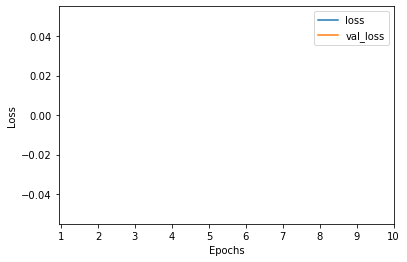

In [19]:
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

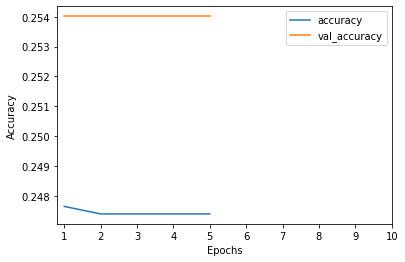

In [20]:
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

In [21]:
# save CNN Model

model.save('face_cnn_model')

INFO:tensorflow:Assets written to: face_cnn_model\assets


In [22]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]